# ADP 27회 실기

In [37]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.formula.api as smf

## 머신러닝 파트
## 1번 데이터 확인 및 전처리

In [81]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/problem1.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
0,60.0,1.069141,0.043786,0.309867,1.316694,-0.462394,-0.857888,0.207904,-0.191270,0.056398,0.041567,-0.507358,-0.108666,-0.473257,0.452046,1.005675,0.185441,-0.439976,89.40,0
1,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,0.00,1
2,426.0,-1.932055,1.724618,1.288229,-0.396998,-0.140202,2.470521,-1.865298,-5.186855,0.794764,0.155379,0.034517,0.906738,-0.027172,-0.404303,-0.473949,0.274034,-0.222340,16.19,0
3,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,529.00,1
4,674.0,-0.719065,0.638954,0.686335,-0.023240,2.317890,3.871978,-0.312797,1.089780,-0.596925,-0.006142,-0.242883,-0.384491,0.109079,0.187565,1.823472,0.274346,-0.697730,22.00,0


In [83]:
df.shape

(1193, 20)

### 1-1. EDA 데이터 탐색 시각화

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1193 non-null   float64
 1   V1      1193 non-null   float64
 2   V2      1193 non-null   float64
 3   V3      1193 non-null   float64
 4   V4      1193 non-null   float64
 5   V5      1193 non-null   float64
 6   V6      1193 non-null   float64
 7   V7      1193 non-null   float64
 8   V8      1193 non-null   float64
 9   V9      1193 non-null   float64
 10  V10     1193 non-null   float64
 11  V11     1193 non-null   float64
 12  V12     1193 non-null   float64
 13  V13     1193 non-null   float64
 14  V14     1193 non-null   float64
 15  V15     1193 non-null   float64
 16  V16     1193 non-null   float64
 17  V17     1193 non-null   float64
 18  Amount  1193 non-null   float64
 19  Class   1193 non-null   int64  
dtypes: float64(19), int64(1)
memory usage: 186.5 KB


In [84]:
print('<답안>')
print('데이터의 총 개수는 1193건이고, 총 변수의 개수는 20개이다. 그리고 NA 값은 존재하지 않는다. 모든 변수는 수치형 변수로 구성되어 있으므로, boxplot을 통해 이상치 유무를 확인한다.')

<답안>
데이터의 총 개수는 1193건이고, NA 값은 존재하지 않는다. 모든 변수는 수치형 변수로 구성되어 있으므로, boxplot을 통해 이상치 유무를 확인한다.


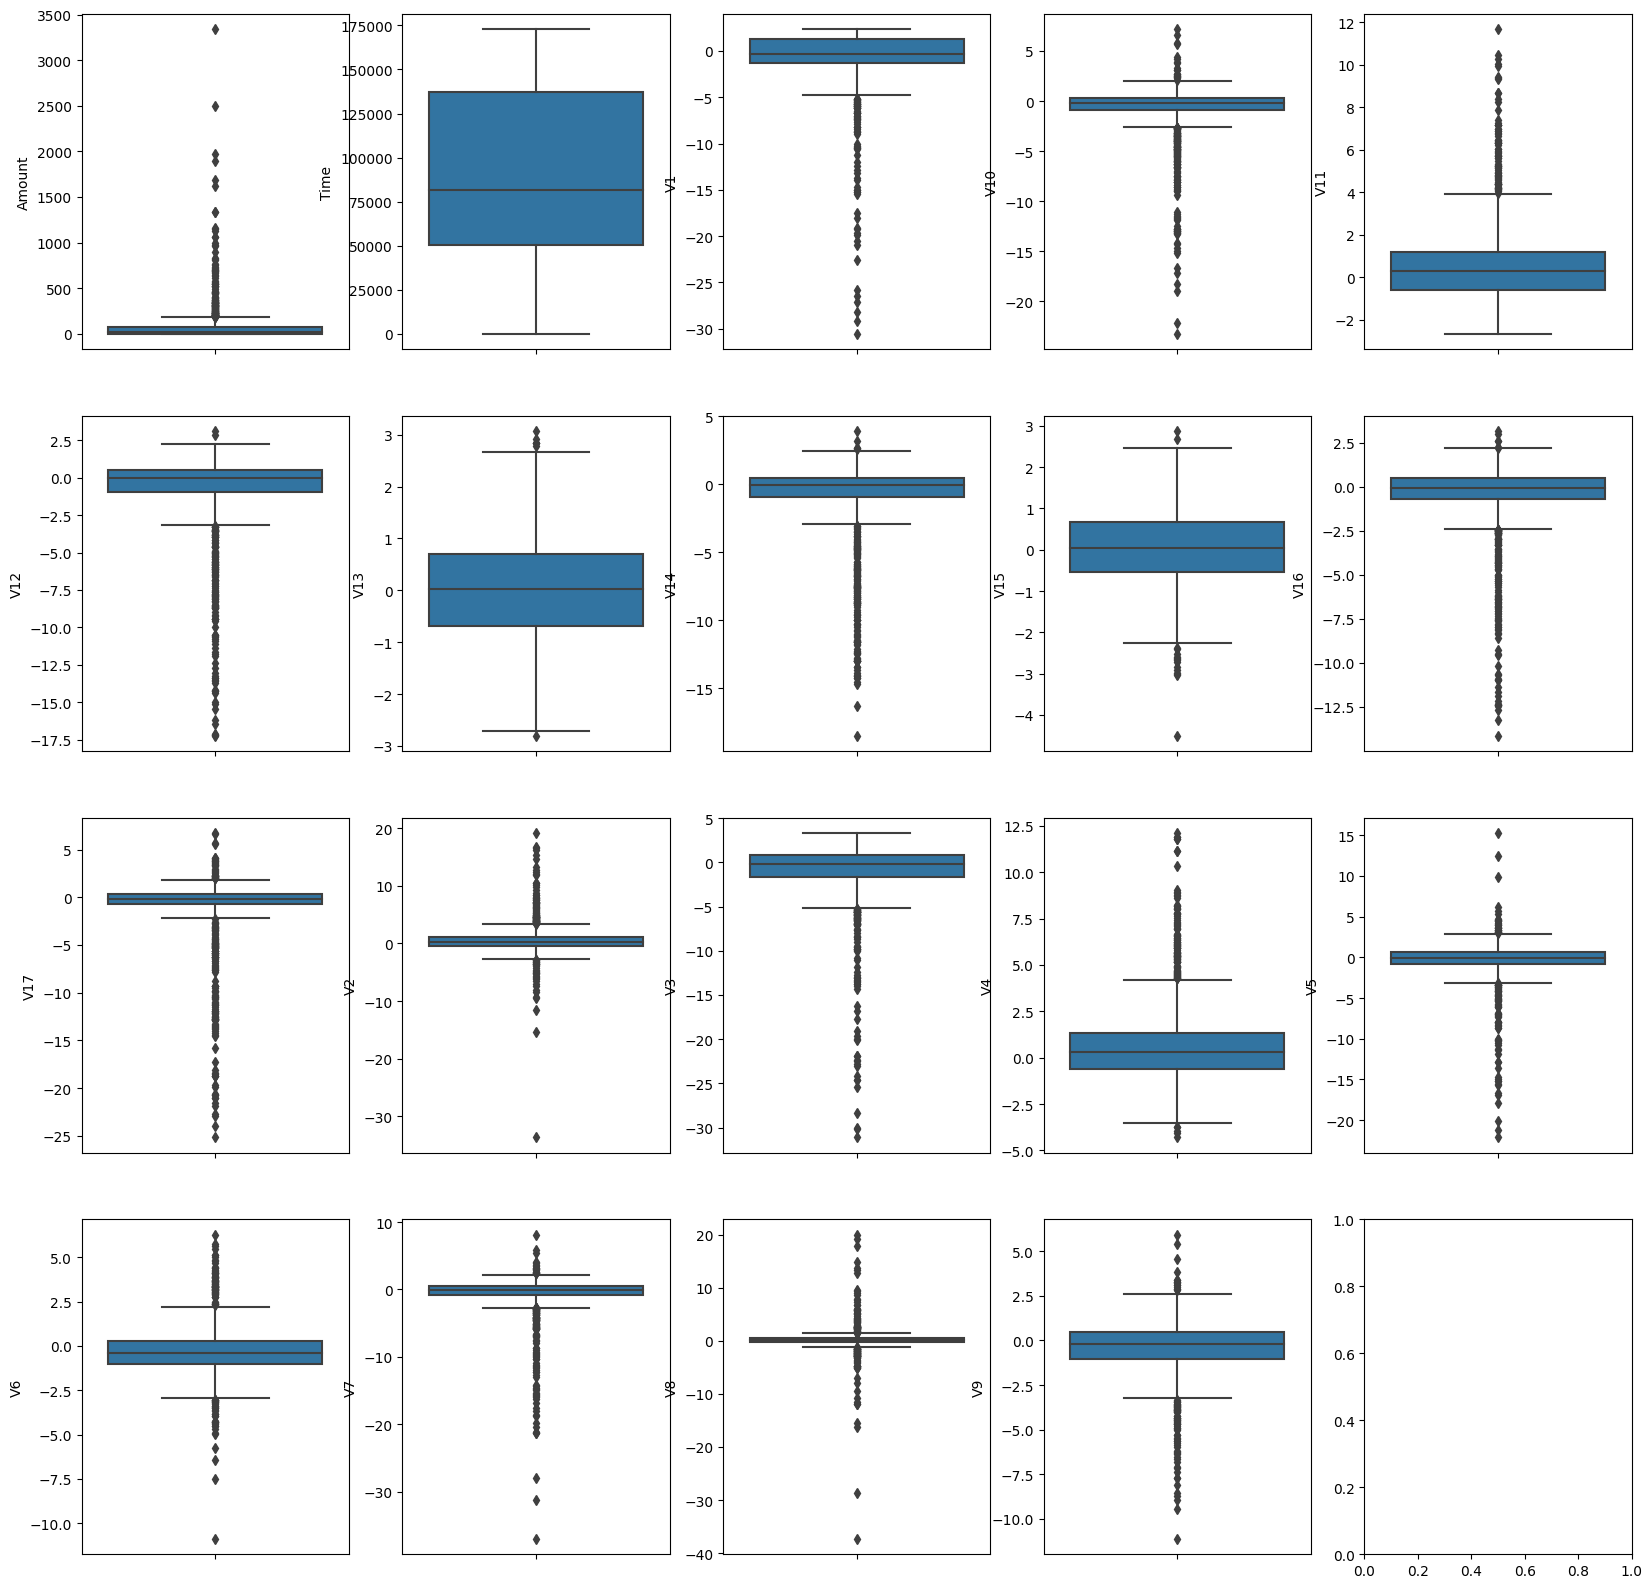

In [101]:
fig, axes = plt.subplots(nrows=4, ncols=len(df.columns)//4, figsize=(20, 20))
for i, col in enumerate(df.columns.difference(['Class'])):
    row_ = i//5
    col_ = i%5
    sns.boxplot(y=df[col], ax=axes[row_][col_])

In [106]:
print('Boxplot을 확인해 본 결과, Time을 제외한 모든 변수에서 이상치가 발견되었으며, 각 변수의 scale이 다름을 확인할 수 있다. 이는 모델링을 수행할 때 변수 변환과 scaling이 필요할 수 있음을 시사한다.')
print('Target Class의 경우 이진 변수이므로, barplot으로 아래와 같이 확인하였다.')

Boxplot을 확인해 본 결과, Time을 제외한 모든 변수에서 이상치가 발견되었으며, 각 변수의 scale이 다름을 확인할 수 있다. 이는 모델링을 수행할 때 변수 변환과 scaling이 필요할 수 있음을 시사한다.
Target Class의 경우 이진 변수이므로, barplot으로 아래와 같이 확인하였다.


In [107]:
print('Class 변수는 0이 993건, 1이 200건으로 데이터 불균형이 존재한다. 데이터 불균형을 해소하기 위한 작업이 추후 필요하다.')
df.Class.value_counts()

Class 변수는 0이 993건, 1이 200건으로 데이터 불균형이 존재한다. 데이터 불균형을 해소하기 위한 작업이 추후 필요하다.


Class
0    993
1    200
Name: count, dtype: int64

### 1-2 변수간 상관관계를 시각화하고 전처리가 필요함을 설명하라

<답안>
변수 간 Pearson 상관계수를 시각화해 보니, 선형 관계가 다수 있음이 발견되었다. 상관관계가 높은 변수는 모델링 수행 시 모델의 성능을 저하시키는 요소이므로, 변수 선택이나 차원 축소를 통해 필요한 변수만 추출해 내는 것이 필요하다.


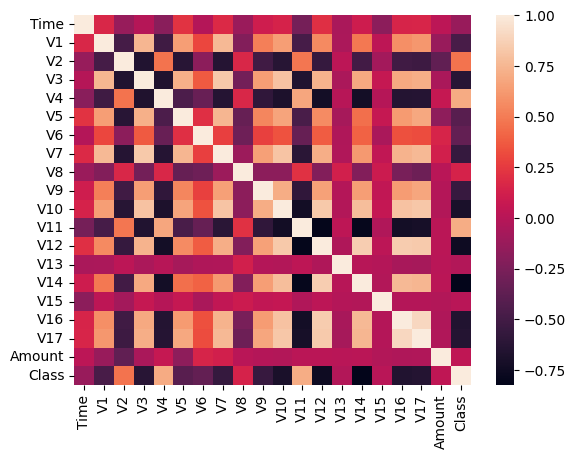

In [100]:
sns.heatmap(df.corr())
print('<답안>')
print('변수 간 Pearson 상관계수를 시각화해 보니, 선형 관계가 다수 있음이 발견되었다. 상관관계가 높은 변수는 모델링 수행 시 모델의 성능을 저하시키는 요소이므로, 변수 선택이나 차원 축소를 통해 필요한 변수만 추출해 내는 것이 필요하다.')

## 2번 차원축소 (1번 이어서)
### 2-1 차원축소 방법 2가지 이상 비교하고 한 가지 선택

In [109]:
print('차원 축소는 Sparsity를 줄이고, 모델 설명력을 높이기 위한 방법이며, 데이터를 더 잘 설명할 수 있는 잠재적인 요소를 추출하여 데이터의 차원을 감소시키는 방법론이다.')
print('가장 대중적인 차원축소 방법으로 주성분분석과 요인분석이 있다. 두 방법 모두 적은 변수 개수로 전체 데이터의 분산 설명력을 최대화하는 데에 그 목적이 있다.')
print('주성분 분석은 자료의 변동이 최대한 보존되는 축을 찾고, 이를 바탕으로 저차원 자료를 생성한다. SVD 알고리즘 기반으로 구현된다.')
print('요인 분석은 유사한 변수를 묶어 공동 요인을 만들고, 이를 이용하여 변수의 상관 구조를 분석한다. Clustering과 유사한 성격을 띄나, 공동 요인을 만드는 데 분석가의 사전 지식이 어느 정도 필요하다.')
print('본 케이스에서는 데이터와 변수에 대한 상세 정보가 부족하기 때문에, 요인분석보다는 주성분분석이 보다 더 적합한 것으로 판단된다.')

차원 축소는 Sparsity를 줄이고, 모델 설명력을 높이기 위한 방법이며, 데이터를 더 잘 설명할 수 있는 잠재적인 요소를 추출하여 데이터의 차원을 감소시키는 방법론이다.
가장 대중적인 차원축소 방법으로 주성분분석과 요인분석이 있다. 두 방법 모두 적은 변수 개수로 전체 데이터의 분산 설명력을 최대화하는 데에 그 목적이 있다.
주성분 분석은 자료의 변동이 최대한 보존되는 축을 찾고, 이를 바탕으로 저차원 자료를 생성한다. SVD 알고리즘 기반으로 구현된다.
요인 분석은 유사한 변수를 묶어 공동 요인을 만들고, 이를 이용하여 변수의 상관 구조를 분석한다. Clustering과 유사한 성격을 띄나, 공동 요인을 만드는 데 분석가의 사전 지식이 어느 정도 필요하다.
본 케이스에서는 데이터와 변수에 대한 상세 정보가 부족하기 때문에, 요인분석보다는 주성분분석이 보다 더 적합한 것으로 판단된다.


### 2-2 추천한 한 가지를 실제로 수행하고 선택한 이유 설명 

In [112]:
print('PCA의 경우, 각 변수의 scale에 영향을 받기 때문에 scaling이 필수적이다. 앞선 EDA에서, 이상치가 다수 확인되었으므로 이상치의 영향을 줄이기 위해 log 변수변환을 먼저 수행하였다.')

PCA의 경우, 각 변수의 scale에 영향을 받기 때문에 scaling이 필수적이다. 앞선 EDA에서, 이상치가 다수 확인되었으므로 이상치의 영향을 줄이기 위해 log 변수변환을 먼저 수행하였다.


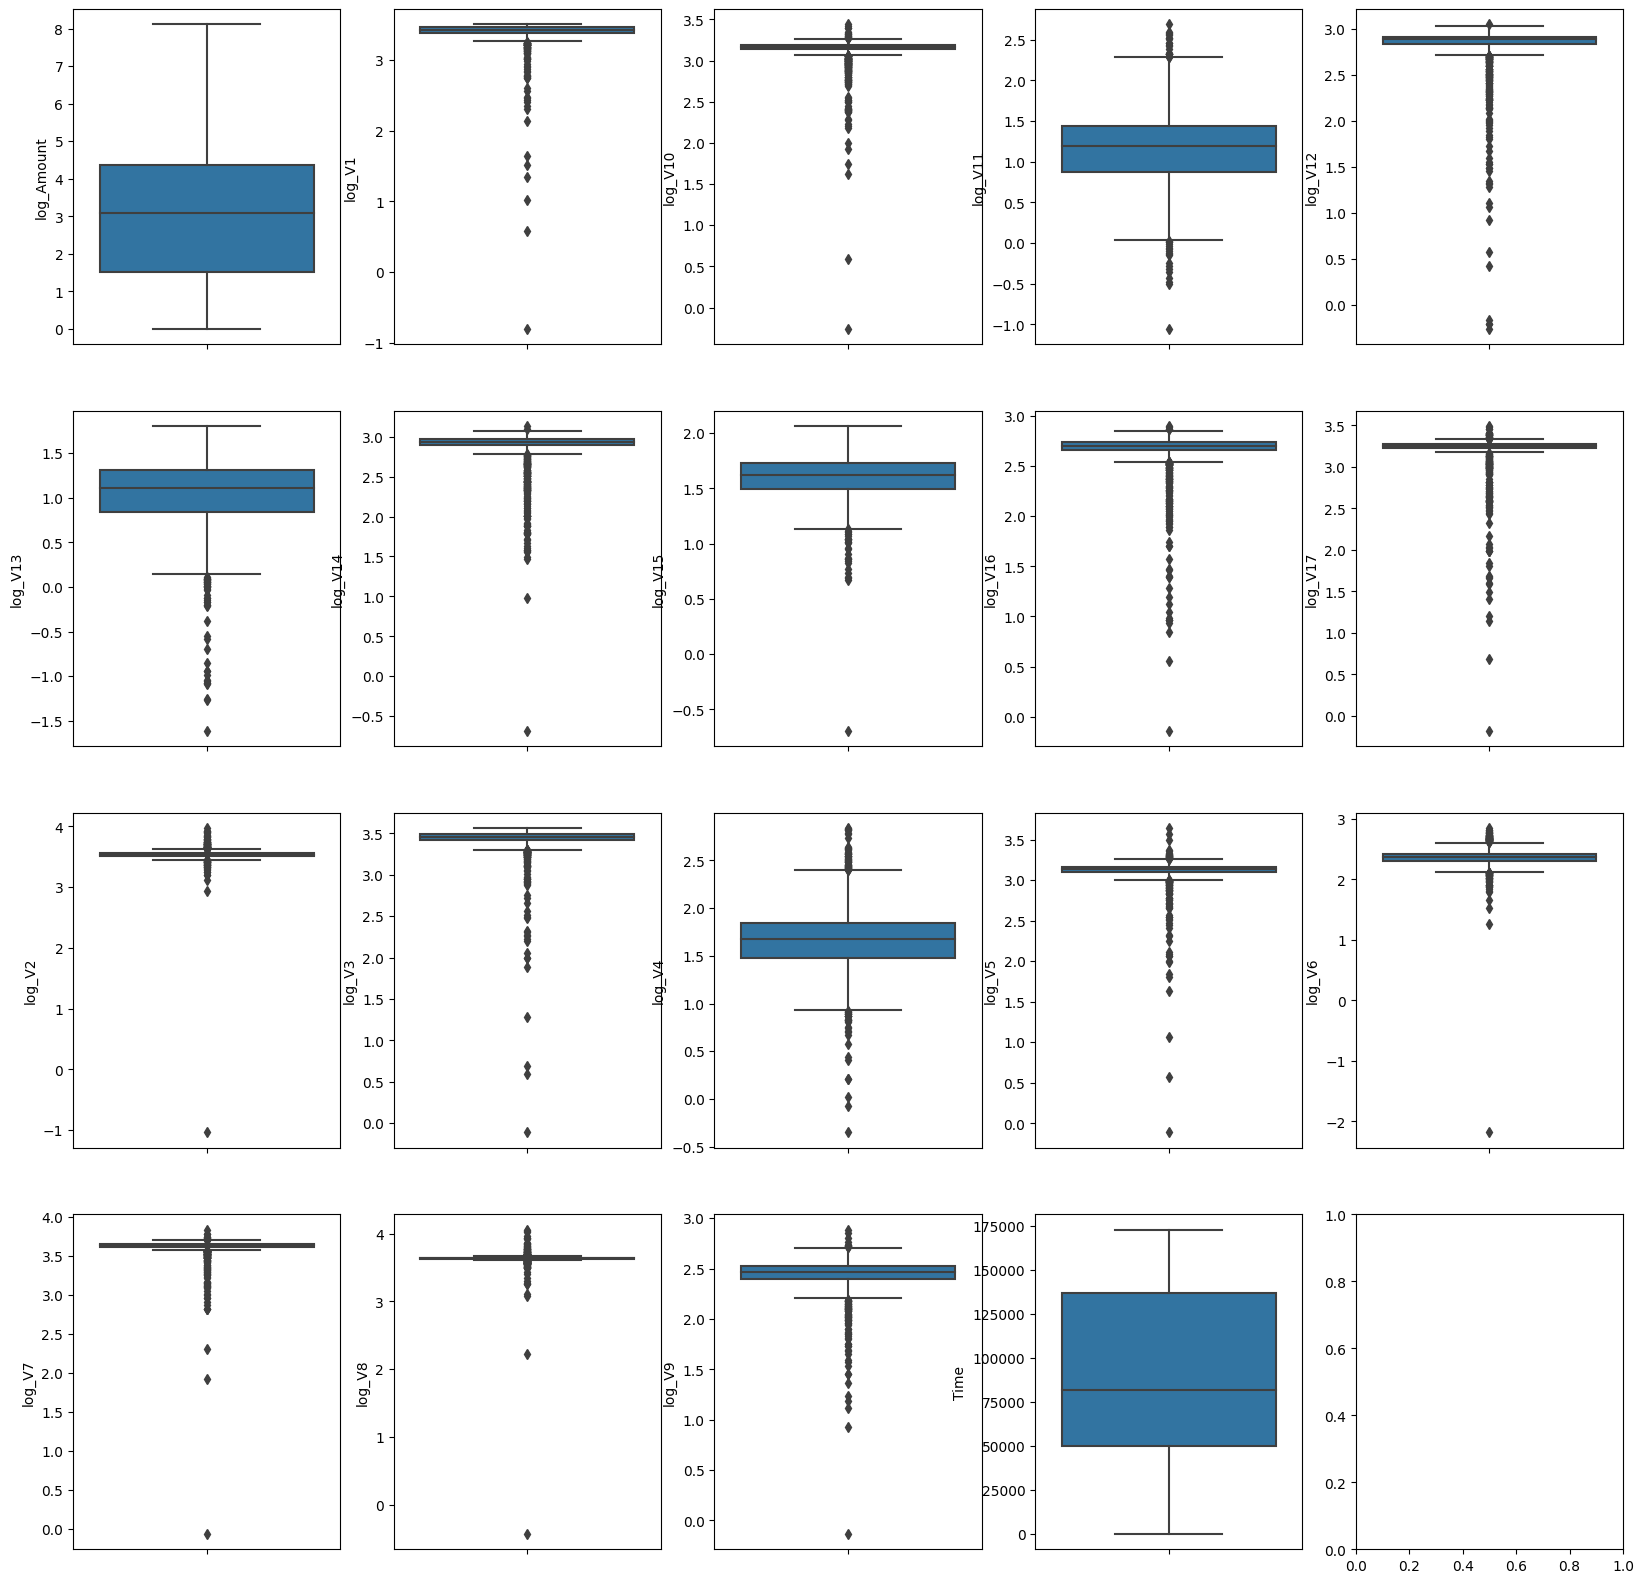

In [141]:
log_columns = df.columns.difference(['Class', 'Time'])

new_df = pd.DataFrame()
for col in log_columns:
    new_df['log_' + col] = np.log1p(df[col] + abs(int(np.min(df[col])))) # 최소값의 절대값을 더해서 0 이상의 값으로 만듦

new_df['Time'] = df['Time']

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 20))
for i, col in enumerate(new_df.columns):
    row_ = i//5
    col_ = i%5
    sns.boxplot(y=new_df[col], ax=axes[row_][col_])

In [142]:
print('log 변환 이후의 데이터 분포를 살펴보았으나, 여전히 이상치의 영향력이 큰 것으로 파악됨. 이상치가 다수 보이기 때문에 이상치의 영향에서 비교적 자유로는 scaling 방법인 RobustScaling을 수행한다.')

log 변환 이후의 데이터 분포를 살펴보았으나, 여전히 이상치의 영향력이 큰 것으로 파악됨. 이상치가 다수 보이기 때문에 이상치의 영향에서 비교적 자유로는 scaling 방법인 RobustScaling을 수행한다.


In [143]:
from sklearn.preprocessing import RobustScaler

In [147]:
scaler = RobustScaler()
x = scaler.fit_transform(new_df)

pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.496012,0.530137,0.226867,-0.489158,-0.063328,-0.379822,0.393010,0.723097,0.205383,-0.275014,-0.122309,0.221577,0.464183,-0.256726,-0.370952,0.229085,-0.393894,0.175341,-0.942431
1,-1.084400,-0.821146,-2.291915,1.129657,-2.099749,-0.484611,-3.427292,0.273227,-0.966494,-2.689684,1.087717,-0.577627,1.428510,-0.296604,-0.835492,-1.990672,1.925154,-1.917456,-0.938441
2,-0.086406,-0.661488,0.322433,-0.139818,0.599431,-0.035458,-0.222644,-0.452833,0.279979,-0.066474,0.946951,0.610795,-0.398453,-0.043656,1.913882,-1.431748,-8.406622,0.640992,-0.938211
3,1.116575,-1.134312,-0.527833,-0.424254,-0.331005,0.414525,-1.203969,1.360404,0.605550,0.705650,-2.313249,0.532261,0.854284,0.910348,-0.536913,0.320628,-0.209536,-0.040303,-0.937680
4,0.015756,-0.165689,0.186672,-0.310070,-0.249864,0.059460,0.205809,1.253841,0.280241,-0.524305,0.262227,0.372723,-0.185660,1.489416,2.710697,-0.179414,1.490170,-0.261105,-0.935351


In [145]:
from sklearn.decomposition import PCA

In [ ]:
# 주성분 추출
pca = PCA(n_components=len(df.columns.difference(['Class'])))
pca_fit = pca.fit(x)

print("고유 값 : ", pca.singular_values_)
print("분산 설명력: ", pca.explained_variance_ratio_)

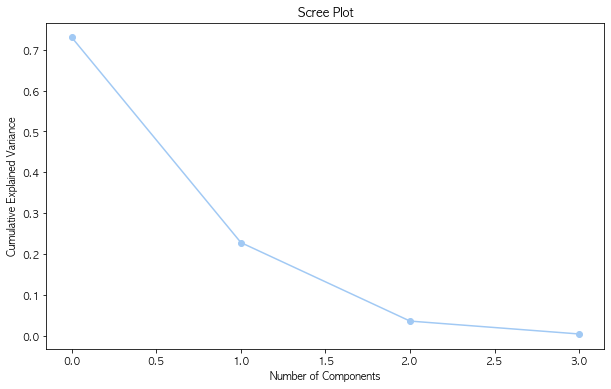

In [610]:
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_ , 'o-')
plt.show()

## 3 오버샘플링 / 언더샘플링 (1번 이어서)
### 3-1 오버샘플링과 언더샘플링의 장단점 비교 및 선택 구현

In [ ]:
print('해당 데이터는 Target data인 Class 변수의 비율에 차이가 있기 때문에, sampling 방법을 통한 클래스 비율 조정이 필수적이다.')
print('Under-sampling은 모델 수행 속도가 빨라진다는 장점이 있으나, 적은 class 개수에 데이터를 맞추기 때문에 데이터 개수가 크게 줄 수 있고, 이로 로 인한 성능 저하를 주의해야 한다.)
print('Over-sampling은 적은 class를 많은 class 개수에 맞게 sampling하여 생성하는 방법으로, Under sampling보다 성능에 유리하나, 동일 데이터를 재성성하는 것으므로 Overfitting 가능성이 있다.')
print('Overfitting만 주의한다면 좋은 모델링 결과를 얻을 수 있는 Over sampling을 선정하여 진행하였다.')

### 3-2 구현 및 알고리즘 2가지 이상 비교, 성능 측정

### 3-3 현재까지 전처리한 데이터를 통해 모델 수행 후 결과 분석

## 4 이상탐지 (1번 이어서)
### 4-1 이상탐지 모델 2가지 이상 기술, 장/단점 설명

In [2]:
print('이상탐지 모델로 주로 활용하는 기법으로는 Isolation Forest와 DBSCAN 방법이 있다.')
print('Isolation Forest는 Tree 가지치기가 되는 횟수에 따라 이상치 정도를 측정하며, 적은 split에 분류되는 데이터를 이상치로 판단한다. Tree기반 모델이므로 Ourlier의 영향에서 자유롭다.')
print('비지도학습 방법이지만, 가지고 있는 label을 통해 성능을 측정해볼 수도 있다.')
print('이상치 스코어에 따른 적절한 cutoff를 결정해야 한다는 불편한 점이 있으나, 분석가의 입맛에 맞게 cutoff를 결정할 수 있어 이는 모델 결과를 자유롭게 활용할 수 있다는 장점이 되기도 한다.')
print('또 다른 방법은 DBSCAN 알고리즘을 이용하는 것으로, DBSCAN 클러스터링 결과에 따라, 클러스터링이 되지 않은 데이터를 이상치로 판단한다. 클러스터링 알고리즘이므로 직관적으로 이상치와 비이상치를 시각화해볼 수 있으며 알고리즘 특성 상 반달 형태의 군집에 잘 적합한다.')
print('하지만 새로운 데이터의 이상치 예측이 불가하며, DBSCAN알고리즘의 하이퍼 파라미터를 정하는 것이 어렵다는 단점이 있다.')

이상탐지 모델로 주로 활용하는 기법으로는 Isolation Forest와 DBSCAN 방법이 있다.
Isolation Forest는 Tree 가지치기가 되는 횟수에 따라 이상치 정도를 측정하며, 적은 split에 분류되는 데이터를 이상치로 판단한다. Tree기반 모델이므로 Ourlier의 영향에서 자유롭다.
비지도학습 방법이지만, 가지고 있는 label을 통해 성능을 측정해볼 수도 있다.
이상치 스코어에 따른 적절한 cutoff를 결정해야 한다는 불편한 점이 있으나, 분석가의 입맛에 맞게 cutoff를 결정할 수 있어 이는 모델 결과를 자유롭게 활용할 수 있다는 장점이 되기도 한다.
또 다른 방법은 DBSCAN 알고리즘을 이용하는 것으로, DBSCAN 클러스터링 결과에 따라, 클러스터링이 되지 않은 데이터를 이상치로 판단한다. 클러스터링 알고리즘이므로 직관적으로 이상치와 비이상치를 시각화해볼 수 있으며 알고리즘 특성 상 반달 형태의 군집에 잘 적합한다.
하지만 새로운 데이터의 이상치 예측이 불가하며, DBSCAN알고리즘의 하이퍼 파라미터를 정하는 것이 어렵다는 단점이 있다.


### 4-2 `2번`에서 만든 데이터로 한 가지 이상탐지 모델을 구현하고, `3번`에서 만든 모델과 비교

In [4]:
print('Isolation Forest 모델을 사용하여 이상치 탐지 모델을 구현해 보았다.')

Isolation Forest 모델을 사용하여 이상치 탐지 모델을 구현해 보았다.


### 4-3 데이터 분석가 관점에서 3번에서 만든 모델과 4번에서 만든 모델 설명

## 통계파트
## 5번
2년 전 제품 생산량이 100,000개, 1년 전 제품 생산량이 150,000개, 그 후 팩토리 기술의 상승으로 제품 생산량이 250,000개 되었을 때, 연평균 상승률의 대푯값을 구하시오. (반올림하여 소수점 아래 둘째자리까지 표기하시오.)

In [68]:
print(f'연도별 상승률은 각각 {round(150000/100000, 2)}, {round(250000/150000, 2)}이고, 이들의 기하평균은 {round(stats.gmean([150000/100000, 250000/150000]), 2)} 이다.')
print('따라서 연평균 상승률의 평균은 1.58이다.')

연도별 상승률은 각각 1.5, 1.67이고, 이들의 기하평균은 1.58 이다.
따라서 연평균 상승률의 평균은 1.58이다.


## 6번
12건의 광고시간 측정. 평균 15.5초, 분산 3.2초 일때 90% 신뢰구간은?

In [77]:
n = 12
mu = 15.5
sigma_2 = 3.2
se = np.sqrt(sigma_2/n)

print(f'광고시간 평균의 90% 신뢰구간은 {stats.t.interval(alpha=0.9, loc=mu, scale=se, df=n-1)} 이다.')

광고시간 평균의 90% 신뢰구간은 (14.572609067393861, 16.427390932606137) 이다.


## 7번
강의 상류와 하류의 생물 다양성 점수에 차이가 있는지 검정하시오. (단, 같은 강에서 상류와 하류는 서로 독립적이지 않으며, 종속적인 관계에 있다.)

- 7.1 귀무가설과 대립가설을 세우시오

- 7.2 검정 통계량과 유의 확률을 구하고, 연구가설 채택여부를 검정하시오.

In [19]:
df_river = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/river.csv')
df_river.head()

,River,up,down
0,A,57.1,45.7
1,B,51.6,37.2
2,C,53.9,53.3
3,D,59.0,54.3
4,E,57.5,46.3


### 7-1 귀무가설과 대립가설을 세우시오

In [ ]:
print('<답안>')
print('H0: 강의 상류와 하류의 생물 다양성 점수에는 차이가 없다.')
print('H0: 강의 상류와 하류의 생물 다양성 점수에는 차이가 있다.')

### 7.2 검정 통계량과 유의 확률을 구하고, 연구가설 채택여부를 검정하시오.

In [35]:
print('같은 강에서 상류와 하류는 서로 독립적이지 않으므로, paired test를 진행한다. paired T-test에서 필요한 데이터의 정규성을 알아보기 위해, 먼저 두 집단의 차이에 대해 정규성 검정 (shapiro-wilk test)을 시행한다.')
df_river['diff'] = df_river['down'] - df_river['up']
print(f"정규성 검정 결과, 검정 통계량 {round(stats.shapiro(df_river['diff'])[0], 3)}, p-value {round(stats.shapiro(df_river['diff'])[1], 3)}으로 두 집단의 차이는 정규성을 가지고 있다라는 귀무가설을 기각할 수 없다. 즉, 두 집단의 차이는 정규분포를 따른다고 볼 수 있으며, 이 가정 하에서 paired T-test를 진행한다.")
print(f"Paired T-test 결과, 검정 통계량 {round(stats.ttest_rel(df_river['down'], df_river['up'], alternative='two-sided')[0], 3)}, p-value {round(stats.ttest_rel(df_river['down'], df_river['up'], alternative='two-sided')[1], 3)}으로 두 집단의 생물 다양성 점수에 차이가 있다는 귀무가설을 기각할 수 없다.")

같은 강에서 상류와 하류는 서로 독립적이지 않으므로, paired test를 진행한다. paired T-test에서 필요한 데이터의 정규성을 알아보기 위해, 먼저 두 집단의 차이에 대해 정규성 검정 (shapiro-wilk test)을 시행한다.
정규성 검정 결과, 검정 통계량 0.955, p-value 0.486으로 두 집단의 차이는 정규성을 가지고 있다라는 귀무가설을 기각할 수 없다. 즉, 두 집단의 차이는 정규분포를 따른다고 볼 수 있으며, 이 가정 하에서 paired T-test를 진행한다.
Paired T-test 결과, 검정 통계량 -1.292, p-value 0.213으로 두 집단의 생물 다양성 점수에 차이가 있다는 귀무가설을 기각할 수 없다.


### 8번
user_counts를 종속변수로 하는 데이터이다

- 8.1 분위수 회귀분석 (Quantile Regression) 을 사용하여 회귀 계수를 구하시오. (반올림하여 소수점 아래 둘째자리까지 표기하시오.)

- 8.2 `8.1`의 모델의 회귀계수를 활용하여 temperature : 10.5 , wind : 8.2 , precipitation : 3.5 일때 user_counts를 예측하시오

In [36]:
df_user = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/problem8.csv')
df_user.head()

,temperature,wind,precipitation,user_counts
0,10.400000,4.600,0.844944,6368
1,5.666667,4.625,0.040860,5902
2,4.933333,4.725,0.008696,6226
3,3.400000,2.675,0.156989,5829
4,8.900000,3.950,7.988462,7589


### 8-1 분위수회귀를 사용하여 백분위 50%로 잡고 회귀 계수를 구하시오.
(반올림하여 소수점 둘째자리 까지 표기하시오)

In [38]:
qreg = smf.quantreg('user_counts ~ temperature + wind + precipitation', df_user).fit(q=0.5)
qreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:            user_counts   Pseudo R-squared:               0.3723
Model:                       QuantReg   Bandwidth:                       840.9
Method:                 Least Squares   Sparsity:                        5590.
Date:                Sun, 20 Aug 2023   No. Observations:                 2097
Time:                        14:51:44   Df Residuals:                     2093
                                        Df Model:                            3
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5941.8395    198.127     29.990      0.000    5553.293    6330.386
temperature     268.8920      6.571     40.918      0.000     256.005     281.779
wind           -129.4050     46.259     -2.797      0.005    -220.124     -38.686
precipitation   -83.3843      7.891    -10.567      0.000     -98.859     -67.910
=================================================================================
"""

In [39]:
print('<답안>')
print('독립변수의 T-test 결과를 보면 모두 0.05 미만이므로, 독립변수는 전부 유의한 회귀 계수이다.')
print('temperature의 회귀 계수는 268.89, wind는 -129.41, percipitaion은 -83.38이다.')

<답안>
독립변수의 T-test 결과를 보면 모두 0.05 미만이므로, 독립변수는 전부 유의한 회귀 계수이다.
temperature의 회귀 계수는 268.89, wind는 -129.41, percipitaion은 -83.38이다.


### 8-2 
`8-1` 모델의 회귀계수를 활용하여 temperature: 10.5, wind: 8.2, precipitation: 3.5 일때 `user_counts`를 예측하시오

In [47]:
print(f'temperature: 10.5, wind: 8.2, precipitation: 3.5 일때 user_counts 예측값은 {round(qreg.predict({"temperature":10.5, "wind":8.2, "precipitation":3.5})[0], 2)}이다.')

temperature: 10.5, wind: 8.2, precipitation: 3.5 일때 user_counts 예측값은 7412.24이다.


### 9번
지하철 호선과 월별, 승객 수 간 상관관계가 있는지 확인(Type III Anova 사용)

- 9.1 귀무가설과 대립가설 설정하라

- 9.2 통계량을 구하고, 대립가설 채택여부를 기술하라

In [48]:
df_subway = pd.read_csv('https://github.com/johyunkang/adp_certificate/files/10883822/subway.csv')
df_subway.head(3)

,line,month,total
0,1,1,1310
1,1,2,1300
2,1,3,1305


### 9-1 귀무가설과 대립가설 설정하라

In [51]:
print('<답안>')
print('두 개의 독립변수를 가지는 분산분석 문제로, 가설은 3가지로 정할 수 있다.')
print('가설 1: 교호작용')
print('H0: 지하철 호선과 월 변수 간 상호작용 효과가 없다.')
print('H1: 지하철 호선과 월 변수 간 상호작용 효과가 있다.')
print('가설 2')
print('H0: 지하철 호선 별로 승객 수에는 차이가 존재하지 않는다.')
print('H1: 지하철 호선 별로 승객 수에는 차이가 있다.')
print('가설 3')
print('H0: 월별로 승객 수에는 차이가 존재하지 않는다.')
print('H1: 월별로 승객 수에는 차이가 있다.')

<답안>
두 개의 독립변수를 가지는 분산분석 문제로, 가설은 3가지로 정할 수 있다.
가설 1: 교호작용
H0: 지하철 호선과 월 변수 간 상호작용 효과가 없다.
H1: 지하철 호선과 월 변수 간 상호작용 효과가 있다.
가설 2
H0: 지하철 호선 별로 승객 수에는 차이가 존재하지 않는다.
H1: 지하철 호선 별로 승객 수에는 차이가 있다.
가설 3
H0: 월별로 승객 수에는 차이가 존재하지 않는다.
H1: 월별로 승객 수에는 차이가 있다.


### 9-2 통계량을 구하고, 대립가설 채택여부를 기술하라

In [53]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [57]:
### Two-way ANOVA
formula = 'total ~ C(line) + C(month) + C(line):C(month)'
model = ols(formula, df_subway).fit()

aov_table = anova_lm(model, typ=3)
aov_table

,sum_sq,df,F,PR(>F)
Intercept,3.466344e+06,1.0,33455.335657,4.849033e-55
C(line),1.336630e+05,2.0,645.022520,6.417946e-29
C(month),3.942483e+04,11.0,34.591616,7.896179e-16
C(line):C(month),9.696908e+04,22.0,42.540665,1.582232e-19
Residual,3.730000e+03,36.0,NaN,NaN


<답안>
먼저, 두 변수의 상호작용에 대한 가설 1을 먼저 검증한다.
두 변수의 상호작용에 대한 F-test 검정통계량은 42.54, p-value 0.000으로 유의수준 0.05 하에서 귀무가설을 기각한다. 지하철 호선과 월 변수 사이에 상호작용이 존재한다.
Interaction plot을 그려 보면, 1호선과 3호선의 월별 승객 수가 교차하는 것을 볼 수 있다.


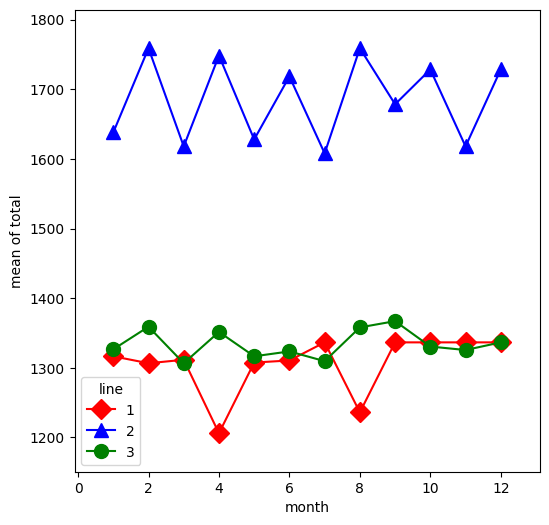

In [80]:
from statsmodels.graphics.factorplots import interaction_plot

line = df_subway["line"]
month = df_subway["month"]
total = df_subway["total"]

fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(month, line, total, colors=['red', 'blue', 'green'], markers=['D', '^', 'o'], ms=10, ax=ax) # 변수는 x1, x2 y 순

print('<답안>')
print('먼저, 두 변수의 상호작용에 대한 가설 1을 먼저 검증한다.')
print('두 변수의 상호작용에 대한 F-test 검정통계량은 42.54, p-value 0.000으로 유의수준 0.05 하에서 귀무가설을 기각한다. 지하철 호선과 월 변수 사이에 상호작용이 존재한다.')
print('Interaction plot을 그려 보면, 1호선과 3호선의 월별 승객 수가 교차하는 것을 볼 수 있다.')